# Lab 5 - Three ways for Agents to Interact

The 3 models:

1. Separate calls to Runner.run()

2. Agent Handoffs, turns within a Runner.run()

    A -> B -> C

3. Agents as Tools, turns within a Runner.run()

    A -> B -> A


Approach (1) is the least juicy & fashionable, but it's the one I recommend the most!

Approach (2) seems really hard to make reliable.

Approach (3) works OK with good enough prompts..

In [1]:
from agents import Agent, Runner, trace, handoff
from IPython.display import Markdown, display
from pydantic import BaseModel, Field
from dotenv import load_dotenv
load_dotenv(override=True)


True

In [2]:

entrepreneur_instructions = "You generate novel, exciting business ideas for Autonomous AI Agents"
entrepreneur_input = """
Propose one compelling business idea for applying Autonomous AI Agents to any industry you choose.
The idea should be unique, high potential commercial impact, and make true use of the autonomous capabilities of AI Agents.
"""

evaluator_instructions = "You evaluate novel, exciting business ideas for Autonomous AI Agents"
evaluator_input = "Evaluate the following business idea; assess it for uniqueness, potential commercial impact, and use of Autonomous AI Agents:\n\n"

## Now let's define 2 important Pydantic Objects to describe our Data

In [3]:
class Idea(BaseModel):
    title: str = Field(description="The title of the idea")
    description: str = Field(description="A detailed description of the idea, in Markdown")

    def print_summary(self):
        print(f"Title: {self.title}")
        display(Markdown(self.description))

In [4]:
class Evaluation(BaseModel):
    idea: Idea = Field(description="The idea that you are evaluating")

    uniqueness_feedback: str = Field(description="Your view on how unique the idea is")
    uniqueness_score: int = Field(description="How unique the idea is, on a scale of 1 to 10, where 1 is mundane and 10 is groundbreaking")

    commercial_feedback: str = Field(description="Your view on the commercial potential of the idea")
    commercial_score: int = Field(description="How high the commercial potential of the idea is from 1 to 10, where 1 is barely profitable and 10 is a billion dollar idea")

    autonomy_feedback: str = Field(description="Your commentary on to what extent the idea truly benefits from the autonomous nature of AI Agents")
    autonomy_score: int = Field(description="How deeply the idea involves autonomous agents from 1 to 10, where 1 is that it plays no meaningful role, and 10 is that it is pivotal")

    def is_brilliant(self):
        return self.uniqueness_score > 8 and self.commercial_score > 8 and self.autonomy_score > 8

    def print_summary(self):
        print(f"Idea: {self.idea.title}")
        print(f"Uniqueness: {self.uniqueness_score}/10: ({self.uniqueness_feedback})")
        print(f"Commercial: {self.commercial_score}/10: ({self.commercial_feedback})")
        print(f"Autonomy: {self.autonomy_score}/10: ({self.autonomy_feedback})")

## Approach 1 (Highly Recommended!) - Call Runner.run() separately

In [5]:
entrepreneur = Agent(name="Entrepreneur", model="gpt-4.1-mini", instructions=entrepreneur_instructions, output_type=Idea)
result = await Runner.run(entrepreneur, entrepreneur_input)
idea = result.final_output_as(Idea)
idea.print_summary()

Title: Autonomous Real-Time Automated Construction Site Manager


### Concept
An Autonomous AI Agent that manages construction sites in real-time without human intervention, optimizing resource allocation, scheduling, safety, and workflow seamlessly.

### How It Works
- The AI integrates inputs from IoT sensors, drones, and wearable devices worn by workers to monitor progress, equipment status, and environmental conditions continuously.
- It autonomously adjusts task assignments and schedules based on real-time data, delays, or safety concerns.
- It directs autonomous construction robots and delivery drones to execute tasks such as material transport, concrete pouring, and structural assembly.
- The AI proactively identifies potential risks, such as unsafe working conditions or resource shortages, and implements corrective measures dynamically.

### Commercial Impact
- Dramatically reduces delays and cost overruns by maintaining optimal workflows without extensive human oversight.
- Enhances worker safety by constantly monitoring and mitigating hazards automatically.
- Increases site productivity through 24/7 autonomous management and robot coordination.
- Provides detailed real-time reporting and analytics, improving decision-making for construction firms.

### Why Autonomous AI Agents?
The complexity and dynamic nature of construction sites require real-time decision-making and orchestration across multiple domains. Autonomous AI agents uniquely offer continuous, adaptive control and coordination, enabling a truly hands-free site management solution — something impossible with traditional software or manual processes.

In [6]:
evaluator = Agent(name="Evaluator", model="gpt-4.1-mini", instructions=evaluator_instructions, output_type=Evaluation)
result = await Runner.run(evaluator, f"{evaluator_input}{idea}")
evaluation = result.final_output_as(Evaluation)
evaluation.print_summary()

Idea: Autonomous Real-Time Automated Construction Site Manager
Uniqueness: 8/10: (The idea is highly unique as fully autonomous, real-time management of construction sites integrating robotics, IoT, and AI for dynamic decision-making has not yet been realized in the industry. While construction tech and AI management tools exist, comprehensive autonomy with real-time robotic orchestration and hazard mitigation is rare and innovative.)
Commercial: 9/10: (This idea has strong commercial potential given the construction industry's scale and the persistent challenges with delays, cost overruns, and safety issues. Automating site management could yield significant cost savings and productivity gains, making it attractive to large construction firms and infrastructure projects globally. The upfront investment and technology integration complexity are challenges but the market impact could be substantial.)
Autonomy: 10/10: (This concept leverages autonomous AI agents deeply, requiring them to

In [7]:
entrepreneur_latest = f"You were originally given the following task:\n\n{entrepreneur_input}\n\n"
remaining_attempts = 4

In [8]:
with trace("Entrepreneur Approach 1"):
    while not evaluation.is_brilliant() and remaining_attempts:
        remaining_attempts -= 1
        entrepreneur_latest += f"You responded with this idea:\n\n{idea}\n\nYou received this feedback:\n\n{evaluation}\n\n"
        entrepreneur_latest += "Now respond with an improved idea that adresses the feedback. Do not directly reference the feedback.\n\n"
        result = await Runner.run(entrepreneur, entrepreneur_latest)
        idea = result.final_output_as(Idea)
        idea.print_summary()
        result = await Runner.run(evaluator, f"{evaluator_input}{idea}")
        evaluation = result.final_output_as(Evaluation)
        evaluation.print_summary()

Title: Autonomous Precision Forestry Management Agent


### Concept
An Autonomous AI Agent dedicated to managing commercial forestry operations with precision and minimal human oversight. It optimizes every stage from tree planting and growth monitoring to harvesting and sustainable forest regeneration.

### How It Works
- The AI continuously gathers data via satellite imagery, drone surveillance, soil sensors, and climate stations to assess tree health, growth rates, and environmental conditions.
- It autonomously directs fleets of drones and ground robots to perform tasks such as targeted planting, pest control, thinning, and selective harvesting based on real-time analysis.
- The agent dynamically adapts forestry schedules to weather patterns, fire risks, and disease outbreaks, minimizing losses and maximizing yield.
- It ensures sustainable practices by monitoring biodiversity indicators and carbon sequestration, adjusting operations to align with ecological standards.

### Commercial Impact
- Increases timber yield and product quality through data-driven, precision forestry management.
- Reduces operational costs by automating labor-intensive tasks and optimizing resource use.
- Mitigates environmental risks and enhances compliance with sustainability regulations, opening market access to eco-conscious consumers and investors.
- Provides actionable insights via real-time reporting dashboards, facilitating strategic decisions for forestry companies.

### Why Autonomous AI Agents?
The complexity and scale of forestry operations require adaptive, continuous decision-making in response to environmental variability. Autonomous agents enable uninterrupted, multi-modal control—integrating remote sensing, robotics, and ecological modeling—to optimize productivity while safeguarding forest health. This level of integrated autonomy is beyond manual or conventional software capabilities, making it a transformative solution for the forestry industry.

Idea: Autonomous Precision Forestry Management Agent
Uniqueness: 8/10: (This idea is fairly unique, combining multiple emerging technologies—autonomous drones, remote sensing, AI-driven decision-making, and sustainable forestry practices—into a unified autonomous agent specifically for precision forestry management. While individual components like drone monitoring or precision agriculture technologies exist, the comprehensive end-to-end automation and ecological integration at this scale and domain are not common today.)
Commercial: 8/10: (The commercial potential is strong given the forestry industry's global scale, the increasing demand for sustainable timber products, and the rising costs of labor and regulatory compliance. Automation can yield significant operational savings and competitive advantages. Moreover, the emphasis on sustainability and ecological monitoring aligns well with emerging market and regulatory trends, potentially opening premium markets and financing opportun

### Concept
An Autonomous AI Agent that provides continuous, personalized health management and wellness optimization by integrating real-time biometric monitoring, lifestyle data, and medical history to autonomously coordinate preventive care, chronic condition management, and emergency interventions without constant human oversight.

### How It Works
- The agent collects data from wearable devices, at-home health sensors, and medical records, analyzing vitals, activity patterns, nutrition, sleep quality, and mental health indicators in real-time.
- It autonomously generates and dynamically updates personalized health plans, including medication management, exercise routines, dietary adjustments, and stress reduction techniques based on evolving user data and medical guidelines.
- The AI proactively schedules appointments, refills prescriptions, and coordinates communications between users and healthcare providers using natural language interfaces.
- In case of detected anomalies or emergencies (e.g., arrhythmia, hypoglycemia, falls), the agent autonomously initiates alerts, contacts emergency services, or adapts care protocols instantly.
- It employs machine learning models to predict health risks and suggests preventive actions, continuously learning and optimizing individual health outcomes.

### Commercial Impact
- Empowers users with personalized, proactive health management, reducing hospital visits and healthcare costs.
- Improves chronic disease outcomes through precise adherence and timely interventions.
- Alleviates healthcare system burdens by automating routine monitoring and coordination.
- Creates new revenue streams via subscription services, partnerships with insurers, and integration with telemedicine platforms.

### Why Autonomous AI Agents?
Personal health management requires constant, context-aware monitoring and rapid response to subtle changes, beyond the capacity of manual tracking or static apps. Autonomous AI Agents uniquely combine continuous data assimilation, adaptive decision-making, and proactive communication across stakeholders, delivering truly personalized and timely care at scale. This autonomous orchestration transforms reactive healthcare into a seamlessly integrated, anticipatory system.

Idea: Autonomous AI-Driven Personalized Health Concierge Agent
Uniqueness: 8/10: (The idea leverages a comprehensive and autonomous approach to personalized health management, combining multiple data sources and proactive healthcare coordination in real time. While elements like health monitoring apps, predictive analytics, and telemedicine exist individually, integrating these into a fully autonomous, continuous, and personalized concierge system that can also autonomously handle emergencies and coordinate care is relatively novel and ambitious. This sets it apart from many current solutions that often require significant human intervention or operate in silos.)
Commercial: 9/10: (The commercial potential is very strong due to growing consumer interest in personalized health and wellness, increasing adoption of wearable health tech, and the ongoing pressure to reduce healthcare costs. The model addresses key pain points for both consumers and healthcare systems. Multiple scalable reve

### Concept
An Autonomous AI Agent that autonomously manages and optimizes complex global supply chains in real-time, seamlessly coordinating logistics, inventory, demand forecasting, and supplier relationships to achieve unprecedented agility, cost efficiency, and resilience.

### How It Works
- The AI continuously ingests and analyzes heterogeneous data streams including supplier performance, shipment tracking, inventory levels, customer demand signals, geopolitical events, and weather forecasts.
- It dynamically adjusts procurement, production scheduling, warehouse distribution, and transportation plans autonomously to preempt disruptions, optimize costs, and meet service-level targets.
- The agent orchestrates autonomous vehicles, robotic warehouses, and smart contracts across suppliers and logistics providers to automate fulfillment workflows.
- It proactively detects risks such as supplier delays, transportation bottlenecks, or sudden demand spikes and initiates corrective actions instantly without human intervention.
- Utilizing reinforcement learning, the AI improves its decision policies over time based on historical outcomes and changing market conditions.

### Commercial Impact
- Dramatically reduces supply chain costs by maximizing asset utilization, minimizing inventory holding, and preventing disruptions.
- Enhances speed and reliability of deliveries, improving customer satisfaction and competitive advantage.
- Increases supply chain transparency and compliance through automated tracking and smart contract enforcement.
- Enables rapid adaptation to market volatility, geopolitical risks, and emerging trends, safeguarding business continuity.
- Unlocks new business models such as just-in-time manufacturing and mass customization through hyper-responsive supply orchestration.

### Why Autonomous AI Agents?
The inherent complexity and volatility in global supply chains require continuous, multi-layered decision-making that reacts instantly to fluctuating conditions. Autonomous AI Agents uniquely combine situational awareness, predictive analytics, and execution capabilities to operate a fully self-managed, adaptive supply chain ecosystem. This level of integrated autonomy surpasses manual oversight and static planning tools, making it a transformative game-changer for modern commerce.

Idea: Autonomous AI-Powered Adaptive Supply Chain Orchestrator
Uniqueness: 8/10: (The idea presents an ambitious integration of multiple advanced technologies and autonomous decision-making specifically tailored for global supply chain orchestration. While components like AI-driven supply chain optimization and robotic automation exist independently, combining them into a fully autonomous, self-managing supply chain orchestrator that leverages real-time heterogeneous data streams and reinforcement learning for continuous adaptation is quite novel. There are startups and solutions aiming at parts of this vision, but a comprehensive autonomous agent managing end-to-end global supply chains in real-time at this scale remains relatively unique.)
Commercial: 9/10: (The commercial potential is very high. Supply chain inefficiencies cost global businesses trillions annually. An autonomous solution that can reduce costs, improve resilience, and enable new business models like just-in-time and 

### Concept
An Autonomous AI Agent that continuously monitors, manages, and optimizes urban infrastructure systems—such as energy grids, water supply networks, transportation, and emergency services—to dynamically respond to environmental stresses, demand fluctuations, and incidents, thereby enhancing resilience, sustainability, and citizen safety without human intervention.

### How It Works
- The AI agent integrates real-time data from heterogeneous sources including IoT sensors embedded in infrastructure, satellite and drone imagery, social media feeds, and environmental sensors covering weather, pollution, and seismic activity.
- It autonomously detects anomalies, potential failures, or stress points in infrastructure systems and dynamically reallocates resources, reroutes traffic/utilities, or initiates preventive maintenance tasks using autonomous drones, robots, and connected devices.
- The agent coordinates cross-sector operations, such as adjusting energy distribution based on transportation demand or prioritizing water usage during emergencies, ensuring system-wide optimization.
- In case of emergencies like natural disasters, accidents, or cyberattacks, it autonomously executes contingency plans, manages evacuation logistics, and orchestrates emergency response units to maximize public safety.
- Employs continual learning to improve adaptive strategies based on past incident data, evolving urban growth patterns, and technological advances.

### Commercial Impact
- Reduces downtime and costly infrastructure failures by proactively managing and mitigating risks.
- Enhances operational efficiency and reduces energy/resource waste through intelligent demand-supply balancing.
- Improves public safety and disaster response effectiveness, reducing economic and human losses.
- Enables cities to comply with sustainability and resilience regulations, attracting investment and improving citizen satisfaction.
- Creates new market opportunities in smart city services, infrastructure management platforms, and insurance risk analytics.

### Why Autonomous AI Agents?
Urban infrastructure systems are highly interconnected, complex, and subject to rapidly changing conditions that exceed human monitoring and control capabilities. Autonomous AI Agents provide continuous, holistic situational awareness and execute real-time, cross-domain decisions and physical interventions without latency or fatigue. This autonomous orchestration across multiple infrastructures transforms urban resilience management from reactive and siloed to proactive, integrated, and adaptive—delivering unprecedented reliability and sustainability.

Idea: Autonomous AI-Driven Dynamic Urban Infrastructure Resilience Manager
Uniqueness: 9/10: (This idea stands out as highly unique because it proposes a comprehensive, fully autonomous system that integrates and manages multiple urban infrastructure domains simultaneously. While elements like smart grids, autonomous drones, and infrastructure monitoring exist individually, the concept of a unified AI agent dynamically orchestrating cross-sector infrastructure resilience autonomously and in real-time is rare and innovative.)
Commercial: 8/10: (The commercial potential is substantial, given the growing global focus on smart cities, climate resilience, and infrastructure modernization. Such a system could save municipalities billions by reducing failures and optimizing resource use, improve public safety, and create new markets in technology and services. However, the complexity, regulatory hurdles, and high integration costs might delay adoption. Over time, the scalable benefits make it

## Approach 2 - Handoff

This seems to be the more unpredictable of the approaches, and I struggle to get it to ever handoff more than 1 loop..

In [9]:
entrepreneur_instructions = "You generate novel, exciting business ideas for Autonomous AI Agents that you pass to the Evaluator to evaluate"
entrepreneur_input = """
Propose one compelling business idea for applying Autonomous AI Agents to any industry you choose.
The idea should be unique, high potential commercial impact, and make true use of the autonomous capabilities of AI Agents.
You MUST handoff your idea to the Evaluator to be evaluated by using the tool Handoff_to_Evaluator. You must always call this tool with your idea or an improved idea.
"""

evaluator_instructions = """
You evaluate novel, exciting business ideas for Autonomous AI Agents.
Evaluate the business idea that you are given; assess it for uniqueness, potential commercial impact, and use of Autonomous AI Agents.
If you would not score the idea 9/10 or 10/10 in all 3 categories, then you must handoff the idea back to the Entrepreneur to improve it by using the tool Handoff_to_Entrepreneur and providing your feedback.
if you do score the idea 9/10 or better in all categories, then respond with the evaluation.
"""

In [11]:
entrepreneur = Agent(name="Entrepreneur", model="gpt-4.1-mini", instructions=entrepreneur_instructions, output_type=Idea)
evaluator = Agent(name="Evaluator", model="gpt-4.1-mini", instructions=evaluator_instructions, output_type=Evaluation)


def on_handoff(ctx, input):
    print("Handoff called")

entrepreneur.handoffs = [handoff(
    agent=evaluator,
    input_type=Idea,
    on_handoff=on_handoff,
    tool_name_override="Handoff_to_Evaluator",
    tool_description_override="Use this tool to handoff your idea to the Evaluator to evaluate. You must always call this tool."
)]

evaluator.handoffs = [handoff(
    agent=entrepreneur,
    input_type=Evaluation,
    on_handoff=on_handoff,
    tool_name_override="Handoff_to_Entrepreneur",
    tool_description_override="Use this tool to handoff your feedback to the Entrepreneur to improve the idea. You should call this tool if your feedback is less than 9/10 in any category."
)]

In [12]:
with trace("Entrepreneur Approach 2"):
    result = await Runner.run(entrepreneur, entrepreneur_input, max_turns=10)

Handoff called
Handoff called


In [13]:
result.final_output.print_summary()

Title: Autonomous AI Agent for Adaptive Urban Farming Management


This business idea leverages Autonomous AI Agents to revolutionize urban farming by fully automating and optimizing indoor and rooftop farms in cities. The AI Agents will autonomously monitor and control all aspects of the farming environment — including light, temperature, humidity, nutrient delivery, and plant health — by using real-time sensor data and advanced predictive analytics. They will dynamically adapt resource allocation and farming schedules based on plant growth stages, weather forecasts, and market demand predictions.

Key features and commercial impact:
- Autonomous environmental control: AI Agents independently adjust conditions for optimal growth without human intervention.
- Predictive crop management: Use AI to forecast harvest times and yields, enabling better supply chain planning.
- Market-driven crop optimization: Agents select and prioritize crops based on real-time local market prices and consumer demand trends.
- Resource efficiency: Drastically reduces water, energy, and nutrient waste through precise control.
- Scalable modular farms: Autonomous management allows farms to scale with minimal incremental labor costs.
- Urban and local food production: Minimizes transportation costs and carbon footprint by producing food closer to consumers.

By applying autonomous AI in urban farming, this idea creates a high-impact solution addressing food security, sustainability, and urbanization challenges while tapping into the growing market for fresh, local produce. The autonomous capabilities allow continuous real-time optimization that human managers cannot achieve, ensuring maximum yield and profitability with minimal operational overhead.

## Approach 3 - Agents as Tools

In [14]:

entrepreneur_instructions = "You generate novel, exciting business ideas for Autonomous AI Agents"
entrepreneur_input = """
Propose one compelling business idea for applying Autonomous AI Agents to any industry you choose.
The idea should be unique, high potential commercial impact, and make true use of the autonomous capabilities of AI Agents.
You must call the Evaluator tool to Evaluate the idea. If the idea is not 9 or 10 in all 3 scores,
then you must improve the idea and call the Evaluator tool again.
Keep improving the idea and calling the Evaluator tool until you get a 9 or 10 in all 3 scores.
Then finally respond with the idea.
"""
evaluator_instructions = """
You evaluate novel, exciting business ideas for Autonomous AI Agents.
Evaluate the following business idea; assess it for uniqueness, potential commercial impact, and use of Autonomous AI Agents.
"""



In [15]:
evaluator = Agent(name="Evaluator", model="gpt-4.1-mini", instructions=evaluator_instructions, output_type=Evaluation)
evaluator_tool = evaluator.as_tool(
    tool_name="Evaluator_Idea_Evaluator",
    tool_description="Evaluates the idea for uniqueness, potential commercial impact, and use of Autonomous AI Agents",
)

entrepreneur = Agent(name="Entrepreneur", model="gpt-4.1-mini", instructions=entrepreneur_instructions, output_type=Idea, tools=[evaluator_tool])

In [18]:
print(entrepreneur)

Agent(name='Entrepreneur', handoff_description=None, tools=[FunctionTool(name='Evaluator_Idea_Evaluator', description='Evaluates the idea for uniqueness, potential commercial impact, and use of Autonomous AI Agents', params_json_schema={'properties': {'input': {'title': 'Input', 'type': 'string'}}, 'required': ['input'], 'title': 'Evaluator_Idea_Evaluator_args', 'type': 'object', 'additionalProperties': False}, on_invoke_tool=<function function_tool.<locals>._create_function_tool.<locals>._on_invoke_tool at 0x11140ab60>, strict_json_schema=True, is_enabled=True, tool_input_guardrails=None, tool_output_guardrails=None)], mcp_servers=[], mcp_config={}, instructions='You generate novel, exciting business ideas for Autonomous AI Agents', prompt=None, handoffs=[], model='gpt-4.1-mini', model_settings=ModelSettings(temperature=None, top_p=None, frequency_penalty=None, presence_penalty=None, tool_choice=None, parallel_tool_calls=None, truncation=None, max_tokens=None, reasoning=None, verbosit

In [17]:
print(evaluator)

Agent(name='Evaluator', handoff_description=None, tools=[], mcp_servers=[], mcp_config={}, instructions='\nYou evaluate novel, exciting business ideas for Autonomous AI Agents.\nEvaluate the following business idea; assess it for uniqueness, potential commercial impact, and use of Autonomous AI Agents.\n', prompt=None, handoffs=[], model='gpt-4.1-mini', model_settings=ModelSettings(temperature=None, top_p=None, frequency_penalty=None, presence_penalty=None, tool_choice=None, parallel_tool_calls=None, truncation=None, max_tokens=None, reasoning=None, verbosity=None, metadata=None, store=None, include_usage=None, response_include=None, top_logprobs=None, extra_query=None, extra_body=None, extra_headers=None, extra_args=None), input_guardrails=[], output_guardrails=[], output_type=<class '__main__.Evaluation'>, hooks=None, tool_use_behavior='run_llm_again', reset_tool_choice=True)


In [16]:
with trace("Entrepreneur Approach 3"):
    result = await Runner.run(entrepreneur, entrepreneur_input)
    idea = result.final_output_as(Idea)
    idea.print_summary()

Title: Decentralized Autonomous Multi-Agent Network with Blockchain Marketplace for Smart Urban Farming


This business idea involves a decentralized network of autonomous AI agent swarms that manage vertical farms across urban areas. Each AI swarm specializes in local farm operations such as planting, watering, pest control, and harvesting, while collaborating across farms to balance crop production based on city-wide demand forecasts and shared environmental data. The system incorporates a blockchain-based transparent marketplace enabling secure, traceable, and fair transactions of produce, resources, and bio-data between farms, local businesses, and consumers through smart contracts.

The AI agents also autonomously curate personalized subscription produce boxes tailored to individual health data, preferences, and seasonal availability, thereby enhancing consumer engagement and fostering trust through end-to-end traceability from seed to sale. This fully autonomous ecosystem dynamically adapts to environmental changes, optimizes resource use and energy efficiency in urban settings, and creates diversified revenue streams through innovative decentralized commerce and personalized nutrition.

By combining multi-agent collaboration, blockchain transparency, AI-driven personalization, and urban sustainable farming, this idea offers a unique, high-impact, and scalable solution that reduces labor costs, enhances sustainability, and meets growing urban demand for fresh, local, and nutritious food.

## OpenAI Traces

We've been writing all this information to OpenAI traces, the 'observability' framework built into OpenAI.

You can take a look at these traces here:

https://platform.openai.com/traces

There's also a nice way to visualize:

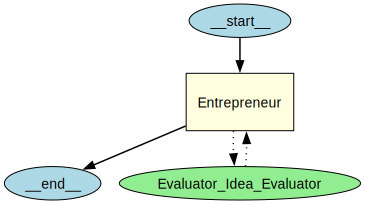

In [19]:
from agents.extensions.visualization import draw_graph
draw_graph(entrepreneur)


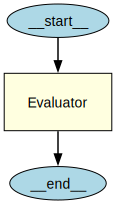

In [20]:
from agents.extensions.visualization import draw_graph
draw_graph(evaluator)
